<a href="https://colab.research.google.com/github/msudhanshu10/Complete-Data-Science/blob/master/Feature_Engineering_Ordinal_Encoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Ordinal Number Encoding
Where you can rank your classes in a feature.

1- Mapping
2- Count/ Freq
3- Target Guided
4- Mean Encoding

# 1. Target Guided

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
from google.colab import files
uploaded= files.upload()

Saving titanic.csv to titanic.csv


In [2]:
df= pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])

In [3]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [4]:
df.isna().mean()

Survived    0.000000
Cabin       0.771044
dtype: float64

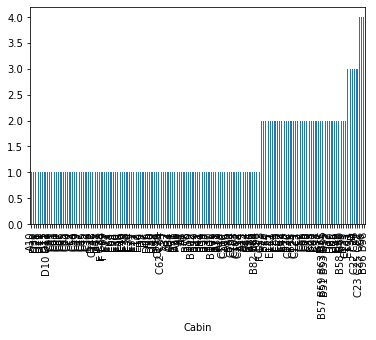

In [5]:
df.groupby(['Cabin'])['Cabin'].count().sort_values(ascending=True).plot.bar()

In [6]:
df['Cabin'].nunique()

147

In [7]:
df['Cabin'].fillna('Missing', inplace=True)

In [8]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [9]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [10]:
df['Cabin'].unique()

array(['M', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [11]:
Cabin_list=df.groupby(['Cabin'])['Survived'].mean().sort_values(ascending=False).index.to_list()

In [12]:
type(Cabin_list)

list

In [13]:
Cabin_list

['D', 'E', 'B', 'F', 'C', 'G', 'A', 'M', 'T']

In [14]:
i=0
for element in Cabin_list:
  i=i+1
length= i
print(i)

9


In [15]:

length

9

In [16]:
Cabin_dict={'D':9, 'E':8, 'B':7, 'F':6, 'C':5, 'G':4, 'A':3, 'M':2, 'T':1}

In [17]:
Cabin_dict

{'A': 3, 'B': 7, 'C': 5, 'D': 9, 'E': 8, 'F': 6, 'G': 4, 'M': 2, 'T': 1}

In [18]:
df['Cabin_encoded']= df['Cabin'].map(Cabin_dict)

In [19]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,2
1,1,C,5
2,1,M,2
3,1,C,5
4,0,M,2


In [20]:
df.Cabin_encoded.unique()

array([2, 5, 8, 4, 9, 3, 7, 6, 1])

# Probability Ratio Encoding

1- Prob of survived based on categorical features.

2- Prob of not survived.

3- Divide P(surv)/P(died)

4- Create a dictionary to map.

5- Replace with the categorical features.

In [21]:
df= pd.read_csv('titanic.csv', usecols=['Cabin', 'Survived'])

In [22]:
df.head()

,Survived,Cabin
0,0,NaN
1,1,C85
2,1,NaN
3,1,C123
4,0,NaN


In [24]:
df['Cabin'].fillna('Missing', inplace= True)

In [25]:
df['Cabin'].unique()

array(['Missing', 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62

In [26]:
df['Cabin']=df['Cabin'].astype(str).str[0]

In [27]:
df.head()

,Survived,Cabin
0,0,M
1,1,C
2,1,M
3,1,C
4,0,M


1- Find out %

In [30]:
prob_df=df.groupby(['Cabin'])['Survived'].mean()

In [31]:
prob_df=pd.DataFrame(prob_df)

In [32]:
prob_df

,Survived
Cabin,
A,0.466667
B,0.744681
C,0.593220
D,0.757576
E,0.750000
F,0.615385
G,0.500000
M,0.299854
T,0.000000


In [33]:
prob_df['Died']=1-prob_df['Survived']
prob_df

,Survived,Died
Cabin,,
A,0.466667,0.533333
B,0.744681,0.255319
C,0.593220,0.406780
D,0.757576,0.242424
E,0.750000,0.250000
F,0.615385,0.384615
G,0.500000,0.500000
M,0.299854,0.700146
T,0.000000,1.000000


Probability Ratio: P(Survived)/ P(Died)

In [34]:
prob_df['prob_ratio']= prob_df['Survived']/prob_df['Died']

In [35]:
prob_df

,Survived,Died,prob_ratio
Cabin,,,
A,0.466667,0.533333,0.875000
B,0.744681,0.255319,2.916667
C,0.593220,0.406780,1.458333
D,0.757576,0.242424,3.125000
E,0.750000,0.250000,3.000000
F,0.615385,0.384615,1.600000
G,0.500000,0.500000,1.000000
M,0.299854,0.700146,0.428274
T,0.000000,1.000000,0.000000


In [37]:
prob_encoded=prob_df['prob_ratio'].to_dict()

In [38]:
df['Cabin_encoded']=df.Cabin.map(prob_encoded)

In [39]:
df.head()

,Survived,Cabin,Cabin_encoded
0,0,M,0.428274
1,1,C,1.458333
2,1,M,0.428274
3,1,C,1.458333
4,0,M,0.428274
